In [1]:
import pandas as pd
import numpy as np
import requests
import json
import pprint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score, f1_score, precision_recall_curve, roc_curve

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [2]:
df = pd.read_csv('traffic_crashes.csv')
df

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,1f1186e0411acc6dcb255905375964f9721a1deb19f463...,2023-07-07 23:30:00,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,23,6,7
1,cc5809e5187918dcbd27eaf4fdf3f1cc8b16a0af90b6bb...,2017-04-15 17:30:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,17,7,4
2,8d7ed21f732dcf4c622c5647b51811874a5e801fa6243a...,2020-06-08 12:00:00,30,NO CONTROLS,NO CONTROLS,UNKNOWN,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,12,2,6
3,a826ba79cb0d2b43d99aa7a2cbc8d06fc0615ab9b03b22...,2024-04-21 05:00:00,25,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5,1,4
4,e8ce402d816159db6198d2b148fbefa79538614d348a68...,2019-10-26 15:50:00,15,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8265,a8f8f886669d38e58e664c23ee2674a2a8f7e16bae5c5b...,2019-04-02 18:00:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,3,4
8266,5508887f8db62b99ad90ddce0e98ce628cb5fe1a71524a...,2021-03-19 08:46:00,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ANGLE,T-INTERSECTION,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,8,6,3
8267,ba2cde0fb7612cf98f428389d1fafc9909686c07b71028...,2023-08-19 10:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10,7,8
8268,7ed1975f6d04230c34cd856811ef46c7c5b399c5fb071a...,2017-01-03 14:00:00,35,NO CONTROLS,NO CONTROLS,FOG/SMOKE/HAZE,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,3,1


In [3]:
df.dtypes

CRASH_RECORD_ID                   object
CRASH_DATE                        object
POSTED_SPEED_LIMIT                 int64
TRAFFIC_CONTROL_DEVICE            object
DEVICE_CONDITION                  object
WEATHER_CONDITION                 object
LIGHTING_CONDITION                object
FIRST_CRASH_TYPE                  object
TRAFFICWAY_TYPE                   object
ALIGNMENT                         object
ROADWAY_SURFACE_COND              object
ROAD_DEFECT                       object
CRASH_TYPE                        object
DAMAGE                            object
PRIM_CONTRIBUTORY_CAUSE           object
SEC_CONTRIBUTORY_CAUSE            object
STREET_NO                          int64
STREET_DIRECTION                  object
STREET_NAME                       object
NUM_UNITS                          int64
MOST_SEVERE_INJURY                object
INJURIES_TOTAL                   float64
INJURIES_FATAL                   float64
INJURIES_INCAPACITATING          float64
INJURIES_NON_INC

In [4]:
df_new = df[['POSTED_SPEED_LIMIT','INJURIES_TOTAL']]


In [5]:
df_new = df_new[df_new['INJURIES_TOTAL'] >= 1]


In [6]:
y = df_new[['POSTED_SPEED_LIMIT']]
x = df_new[['INJURIES_TOTAL']]

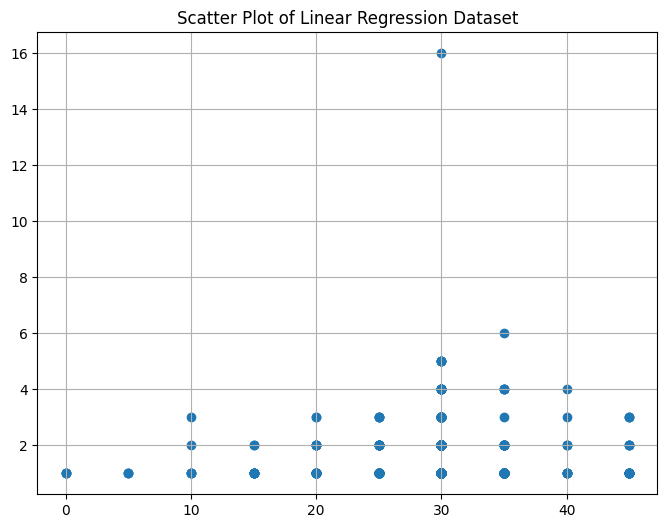

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(df_new['POSTED_SPEED_LIMIT'], df_new['INJURIES_TOTAL'])
plt.title('Scatter Plot of Linear Regression Dataset')
plt.grid(True)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 56)

In [9]:
X_train.head()

,INJURIES_TOTAL
6991,1.0
1632,1.0
6857,1.0
434,1.0
8178,1.0


In [10]:
y_train.head()

,POSTED_SPEED_LIMIT
6991,30
1632,30
6857,10
434,30
8178,30


In [11]:
if len(set(X_train.index) & set(X_test.index)) == 0:
    print("Training and test datasets are disjoint.")
else:
    print("Training and test datasets are not disjoint.")

Training and test datasets are disjoint.


In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [13]:
score = reg.score(X_test,y_test)
score

0.0028967653652081093